In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import matplotlib
import numpy as np
import data_prep
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_verkocht = pd.read_csv('C:\\Users\\jniens\\GoogleDrive\\Python_Projects\\real_estate_analysis\\data_files\\csv\\verkochte_woningen_driemaanden.csv', sep=';')
df_stadsdelen = pd.read_csv('C:\\Users\\jniens\\GoogleDrive\\Python_Projects\\real_estate_analysis\\data_files\\csv\\dim_stadsdelen3.csv', sep=';')

In [3]:
df_verkocht_1 = data_prep.prep_df(df_verkocht, df_stadsdelen)

In [4]:
df_verkocht_1.head()

,postcode,stadsdeel,Soort OG,Soort appartement,Aantal kamers,Dagen op de markt,Woonoppervlakte,Inhoud woning,Status,Datum aanmelding,...,Huur conditie,Koop conditie,huidige_huur,huidige_prijs,prijs_perm2,transactieprijs,transactieprijs_perm2,trans_eq_huid,trans_gt_huid,trans_lt_huid
id,,,,,,,,,,,,,,,,,,,,,
Korte Geuzenstraat-700-22,1056,West,Appartement,bovenwoning,1,119,9,27,Verkocht,2019-04-11,...,NaN,Kosten koper,NaN,97500,10833.0,90000.0,10000,False,False,True
Jisperveldstraat-581-,1024,Noord,Appartement,tussenverdieping,1,24,30,113,Verkocht,2019-05-15,...,NaN,Kosten koper,NaN,139500,4650.0,160500.0,5350,False,True,False
Amerbos-152-,1025,Noord,Appartement,galerijflat,1,21,29,105,Verkocht,2019-06-26,...,NaN,Kosten koper,NaN,139500,4810.0,153700.0,5300,False,True,False
Dostojevskisingel-325-,1102,Zuid-Oost,Appartement,bovenwoning,2,25,34,98,Verkocht,2019-06-04,...,NaN,Kosten koper,NaN,140000,4118.0,160500.0,4721,False,True,False
Dantestraat-138-,1102,Zuid-Oost,Appartement,bovenwoning,1,21,34,110,Verkocht,2019-02-13,...,NaN,Kosten koper,NaN,145000,4265.0,153000.0,4500,False,True,False


In [5]:
sub_cols = ['Woonoppervlakte', 'Inhoud woning', 'Soort OG', 'transactieprijs']

In [6]:
df_verkocht_2 = df_verkocht_1[sub_cols]
df_verkocht_3 = df_verkocht_2.dropna()

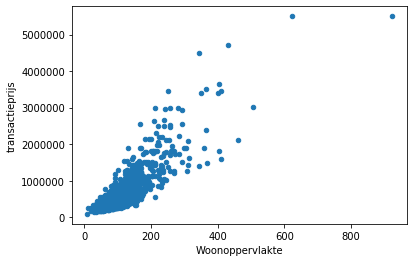

In [7]:
df_verkocht_3.plot.scatter(x='Woonoppervlakte', y='transactieprijs')

In [8]:
X = np.array(df_verkocht_3[[
    #'Woonoppervlakte' 
    'Inhoud woning'
    ]])
X = np.array(df_verkocht_3[[
    #'Woonoppervlakte' 
    'Inhoud woning'
    ]])
y = np.array(df_verkocht_3[['transactieprijs']])

In [9]:
model = LinearRegression(fit_intercept=True) # 2. instantiate model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
model.fit(X_train, y_train) # 3. fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.score(X_test, y_test) # 4. predict on new data

0.7212759482943889

In [13]:
X_inhoud = np.array(df_verkocht_3[[
    'Inhoud woning'
    ]])
X_oppervlakte = np.array(df_verkocht_3[[
    'Woonoppervlakte'
    ]])
X_both = np.array(df_verkocht_3[[
    'Woonoppervlakte',
    'Inhoud woning'
    ]])
y = np.array(df_verkocht_3[['transactieprijs']])

In [14]:
model = LinearRegression(fit_intercept=True) # 2. instantiate model
model_oppervlakte = LinearRegression(fit_intercept=True) # 2. instantiate model
model_both = LinearRegression(fit_intercept=True) # 2. instantiate model

model_inhoud_train_test = LinearRegression(fit_intercept=True) # 2. instantiate model
model_oppervlakte_train_test = LinearRegression(fit_intercept=True) # 2. instantiate model
model_both_train_test = LinearRegression(fit_intercept=True) # 2. instantiate model

In [15]:
model_inhoud.fit(X_inhoud, y) # 3. fit the model
model_oppervlakte.fit(X_oppervlakte, y) # 3. fit the model
model_both.fit(X_both, y) # 3. fit the model

NameError: name 'model_inhoud' is not defined

In [ ]:
X_train_inhoud, X_test_inhoud, y_train_inhoud, y_test_inhoud = train_test_split(X_inhoud, y, test_size=0.2)
X_train_oppervlakte, X_test_oppervlakte, y_train_oppervlakte, y_test_oppervlakte = train_test_split(X_oppervlakte, y, test_size=0.2)
X_train_both, X_test_both, y_train_both, y_test_both = train_test_split(X_both, y, test_size=0.2)

model_inhoud_train_test.fit(X_train_inhoud, y_train_inhoud) # 3. fit the model
model_oppervlakte_train_test.fit(X_train_oppervlakte, y_train_oppervlakte) # 3. fit the model
model_both_train_test.fit(X_train_both, y_train_both) # 3. fit the model

In [ ]:
model_inhoud_score = model_inhoud.score(X_inhoud, y) # 4. predict on new data

In [ ]:
model_oppervlakte_score = model_oppervlakte.score(X_oppervlakte, y) # 4. predict on new data

In [ ]:
model_both_score = model_both.score(X_both, y) # 4. predict on new data

In [ ]:
model_inhoud_train_test_score = model_inhoud_train_test.score(X_test_inhoud, y_test_inhoud) # 4. predict on new data

In [ ]:
model_oppervlakte_train_test_score = model_oppervlakte_train_test.score(X_test_oppervlakte, y_test_oppervlakte) # 4. predict on new data

In [ ]:
model_both_train_test_score = model_both_train_test.score(X_test_both, y_test_both) # 4. predict on new data

In [ ]:
print(f'Inhoud scores {round(model_inhoud_score, 2)} op r squared en {round(model_inhoud_train_test_score, 2)} on accuracy.')
print(f'Oppervlakte scores {round(model_oppervlakte_score, 2)} op r squared en {round(model_oppervlakte_train_test_score, 2)} on accuracy.')
print(f'Both scores {round(model_both_score, 2)} op r squared en {round(model_both_train_test_score, 2)} on accuracy.')